# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [1]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [16]:
customer_df = pd.read_csv("/Users/leozinho.air/Desktop/ironhack_da/class_04/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

# dropping useless columna

customer_df = customer_df.drop(['Unnamed: 0'], axis = 1)
customer_df = customer_df.drop(['Vehicle Type'], axis = 1)



In [17]:
# formatting columns

col = []

for i in range(len(customer_df.columns)):
    col.append(customer_df.columns[i].lower().replace(' ', '_'))

customer_df.columns = col

customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [20]:
# Check the data types of the columns.
# Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.

cust_num = customer_df.select_dtypes(include = np.number)

cust_cat = customer_df.select_dtypes(include = object)

cust_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


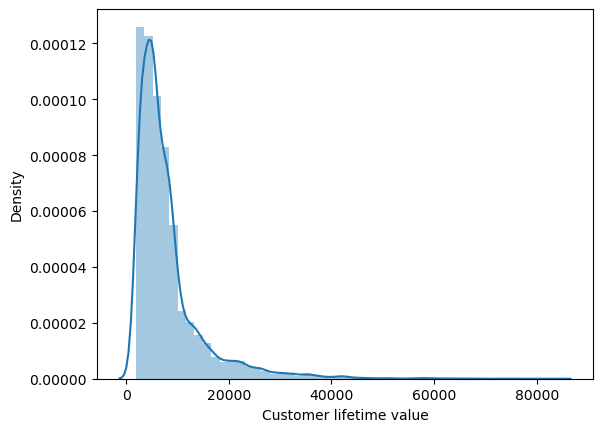

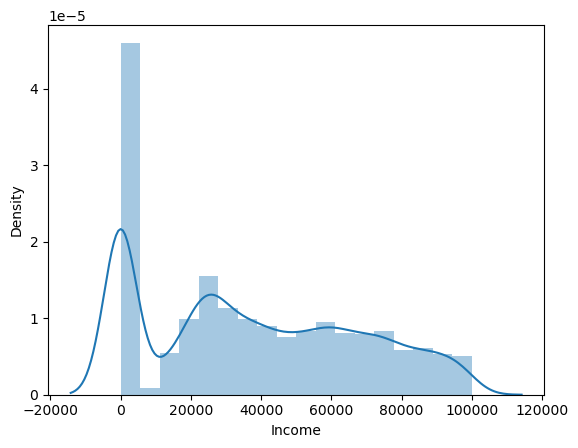

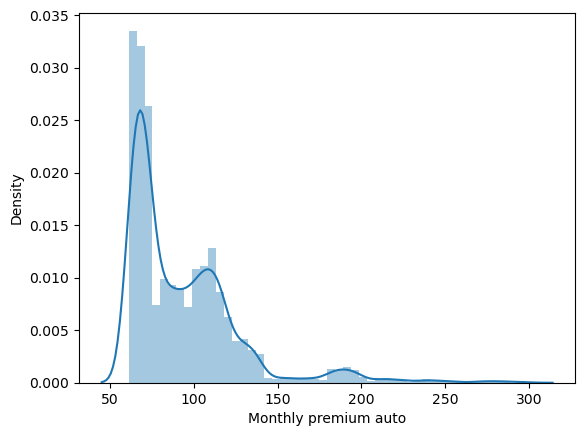

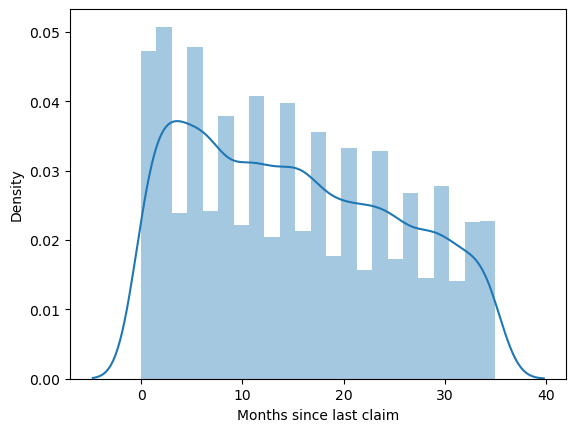

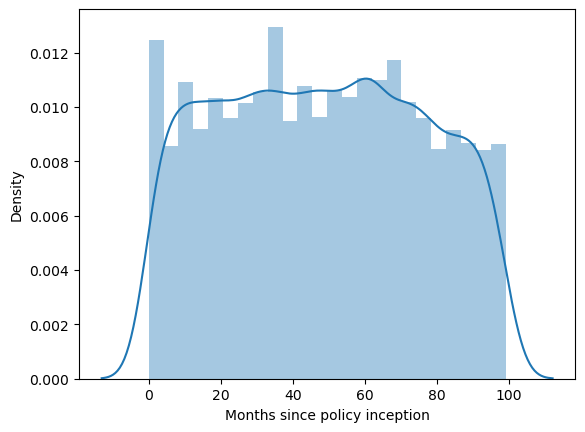

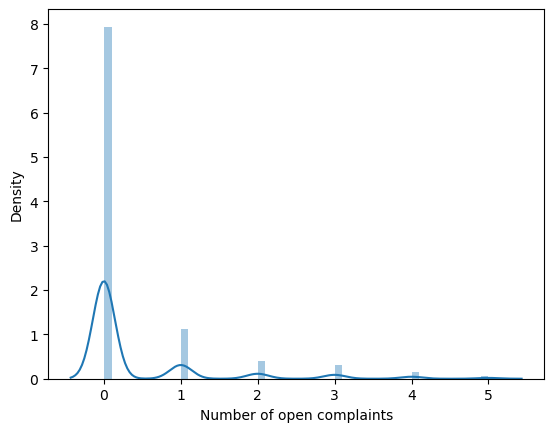

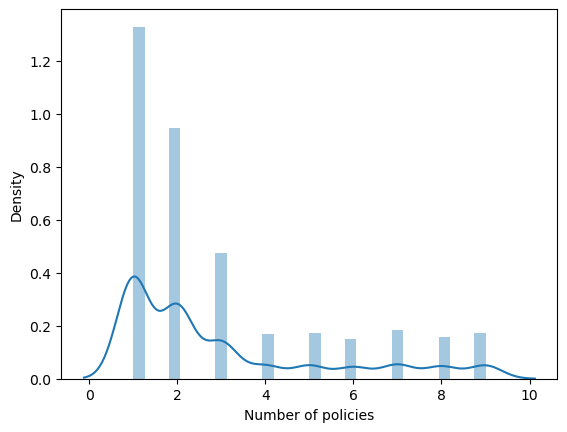

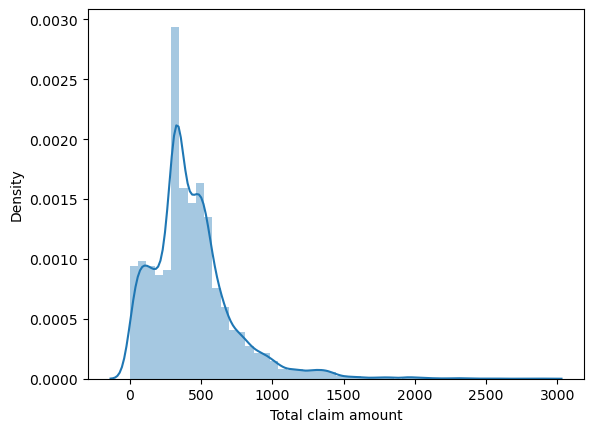

In [77]:
# Now we will try to check the normality of the numerical variables visually.

# Use seaborn library to construct distribution plots for the numerical variables

# 

def plot_distribution(data, columns):
    
    '''This function automatizes the creation of the dist plots on seaborn'''
    
    for column in columns:
        sns.distplot(data[column])
        plt.xlabel(column.capitalize().replace('_', ' '))
        plt.show()

columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']

plot_distribution(cust_num, columns)





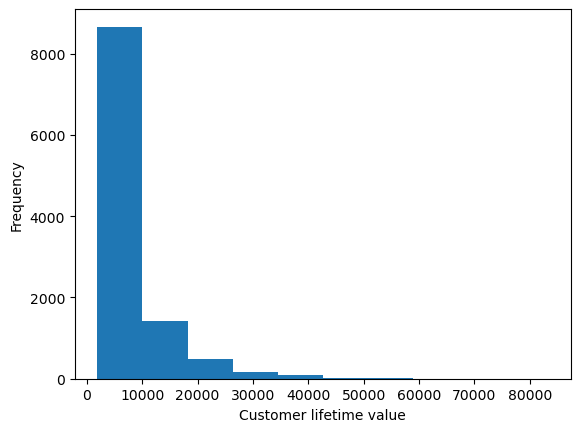

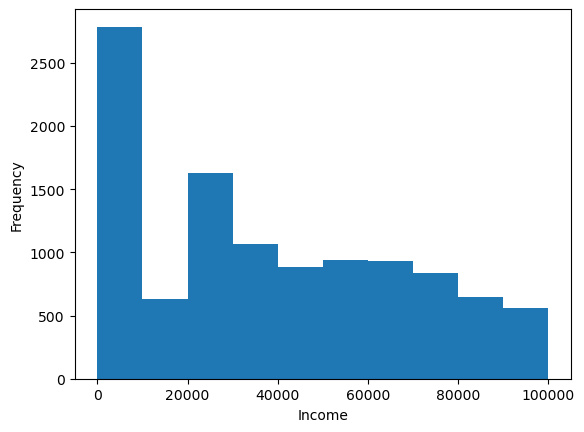

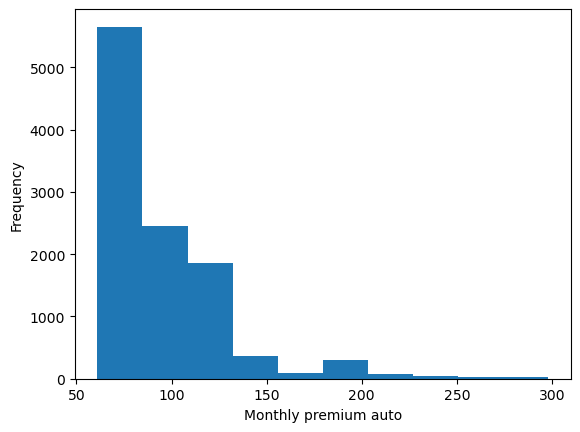

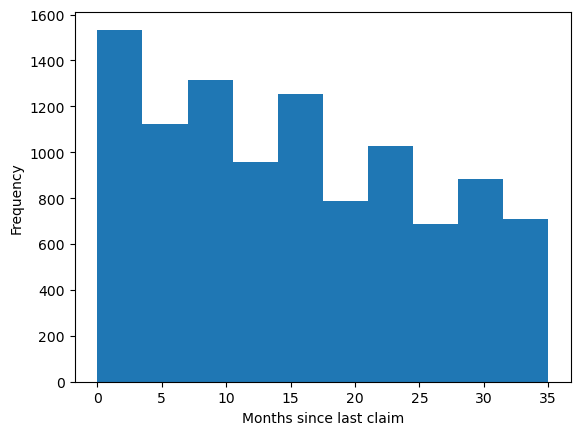

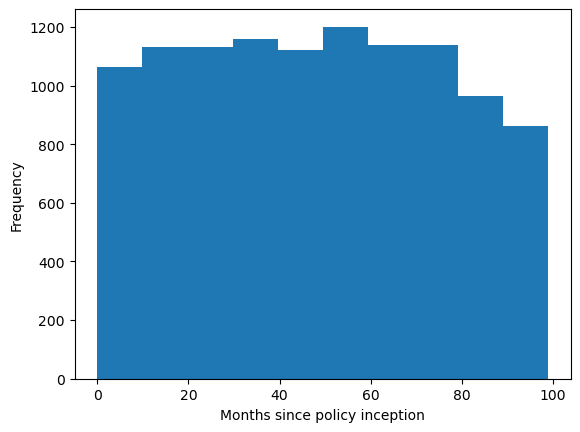

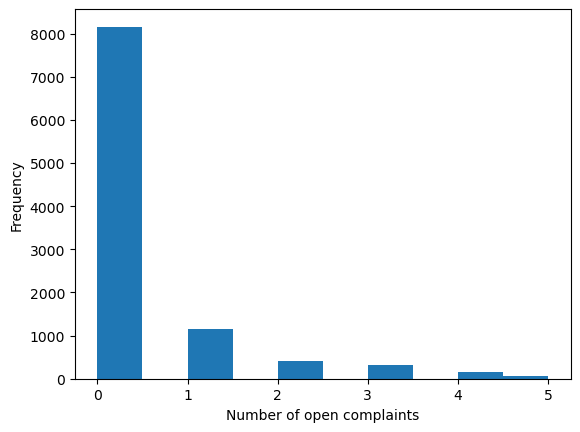

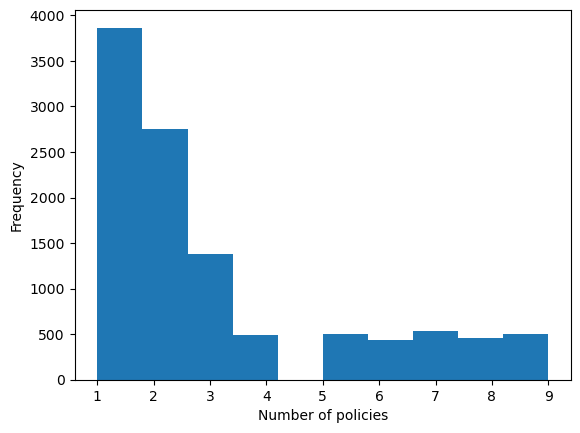

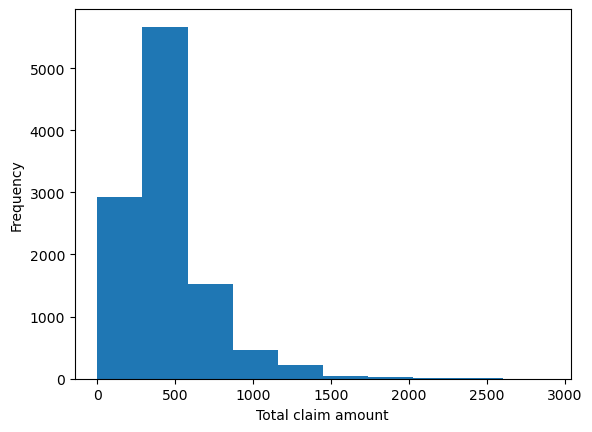

In [80]:
# Use Matplotlib to construct histograms

def hist_plot (data, columns):
    
    '''This function automatizes the creation of the hist plots on matplotlib'''
    
    for column in columns:
        plt.hist(data[column])
        plt.xlabel(column.capitalize().replace('_', ' '))
        plt.ylabel('Frequency')
        plt.show()

hist_plot(cust_num,columns)


In [84]:
# Do the distributions for different numerical variables look like a normal distribution?

print('No, they do not seem to have a normal distribution. The only one that seem to have it is Month Since Policy Inception column ')

No, they do not seem to have a normal distribution. The only one that seem to have is Month Since Policy Inception column 


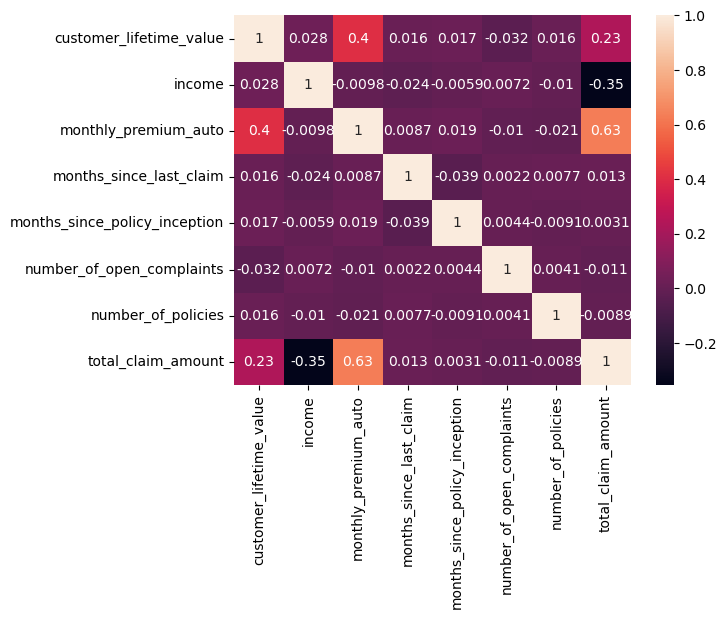

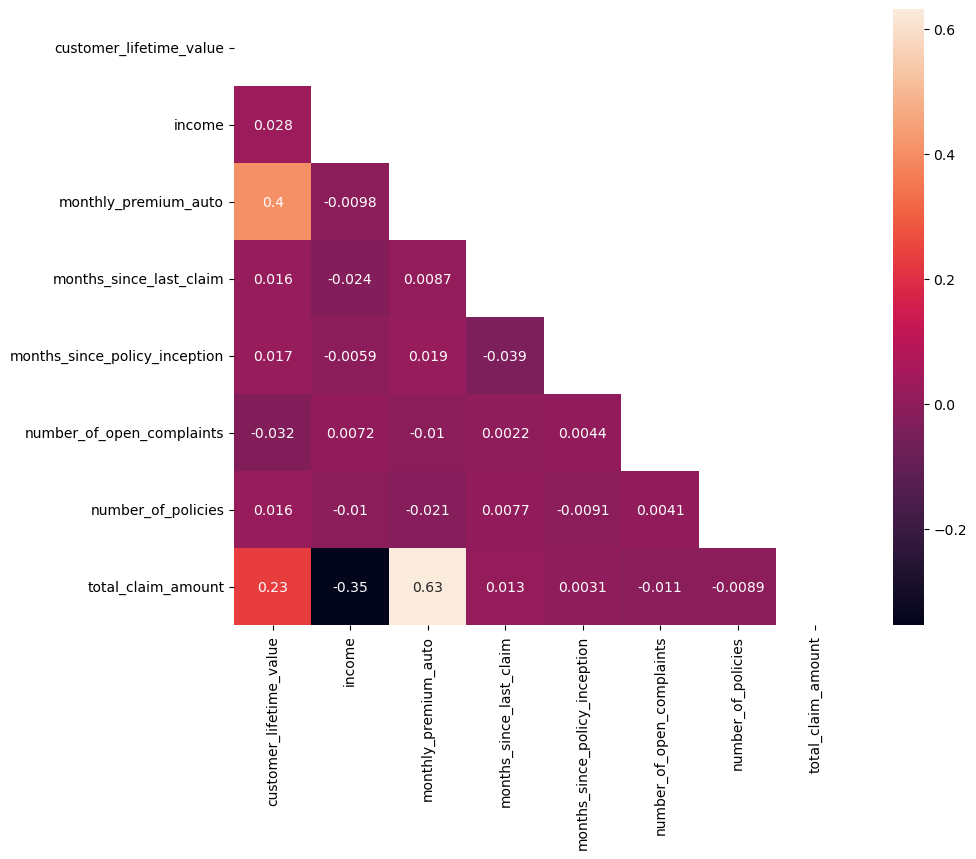

In [88]:
# For the numerical variables, check the multicollinearity between the features. 

# Please note that we will use the column total_claim_amount later as the target variable.

correlations_matrix = cust_num.corr()
correlations_matrix

# Visualizing the correlation matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()



In [93]:
# Drop one of the two features that show a high correlation between them (greater than 0.9).
# Write code for both the correlation matrix and for seaborn heatmap.
# If there is no pair of features that have a high correlation, then do not drop any features

print('There is no pair of features that have a correlation greater or equal to 0.9, so i will not drop anything')

There is no pair of features that have a correlation greater or equal to 0.9, so i will not drop anything
